In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [114]:
def get_dataframes(query, databases):
    dataframes = []
    for database in databases:
        db = sqlite3.connect(database)
        dataframes += [pd.read_sql_query(query, db)]
    return pd.concat(dataframes)

In [115]:
query = 'select executor, tasks_per_trial, returned, start_submit, connected_workers, tag from tasks'
strong_databases = [             
             '../theta-scaling/strong-scaling/data.db', 
            'strong_data.db'
             ]
strong_tasks = get_dataframes(query, strong_databases)
strong_tasks

,executor,tasks_per_trial,returned,start_submit,connected_workers,tag
0,theta_funcx,50000,1.553744e+09,1.553744e+09,128,noop
1,theta_funcx,50000,1.553746e+09,1.553746e+09,128,noop
2,theta_funcx,50000,1.553747e+09,1.553747e+09,256,noop
3,theta_funcx,50000,1.553747e+09,1.553747e+09,512,noop
4,theta_funcx,50000,1.553747e+09,1.553747e+09,1024,noop
...,...,...,...,...,...,...
11,cori_funcX_shifter,100000,1.554570e+09,1.554570e+09,64,noop
12,cori_funcX_shifter,100000,1.554571e+09,1.554571e+09,128,noop
13,cori_funcX_shifter,100,1.554576e+09,1.554576e+09,256,sleep1000ms
14,cori_funcX_shifter,100000,1.554584e+09,1.554583e+09,256,raw_sleep1000ms


In [116]:
weak_databases = [
            '../theta-scaling/weak-scaling/data.db',
            '../cori/weak-scaling/data.db',
            ]
weak_tasks = get_dataframes(query, weak_databases)
weak_tasks

,executor,tasks_per_trial,returned,start_submit,connected_workers,tag
0,theta_funcx,640,1.553811e+09,1.553811e+09,64,noop
1,theta_funcx,640,1.553811e+09,1.553811e+09,64,sleep1000ms
2,theta_funcx,1280,1.553811e+09,1.553811e+09,128,noop
3,theta_funcx,1280,1.553811e+09,1.553811e+09,128,sleep1000ms
4,theta_funcx,2560,1.553813e+09,1.553813e+09,256,noop
...,...,...,...,...,...,...
424,cori_funcX_shifter,640,1.554673e+09,1.554673e+09,64,noop
425,cori_funcX_shifter,1280,1.554673e+09,1.554673e+09,128,noop
426,cori_funcX_shifter,2560,1.554673e+09,1.554673e+09,256,noop
427,cori_funcX_shifter,10240,1.557939e+09,1.557939e+09,1024,noop


In [117]:
weak_tasks['tag'].unique()

array(['noop', 'sleep1000ms', 'sleep100ms', 'sleep10000ms', 'sleep10ms',
       'sleep10s', 'sleep100s'], dtype=object)

In [118]:
strong_tasks['completion time'] = strong_tasks['returned'] - strong_tasks['start_submit']
strong_tasks.head()
weak_tasks['completion time'] = weak_tasks['returned'] - weak_tasks['start_submit']
weak_tasks['tasks/workers'] = weak_tasks['tasks_per_trial'].map(str) + '/' + weak_tasks['connected_workers'].map(str)

In [119]:
weak_tasks[(weak_tasks['tag'] == 'noop') & (weak_tasks['executor'] == 'theta_funcx')]

,executor,tasks_per_trial,returned,start_submit,connected_workers,tag,completion time,tasks/workers
0,theta_funcx,640,1.553811e+09,1.553811e+09,64,noop,1.339171,640/64
2,theta_funcx,1280,1.553811e+09,1.553811e+09,128,noop,1.855152,1280/128
4,theta_funcx,2560,1.553813e+09,1.553813e+09,256,noop,1.953756,2560/256
6,theta_funcx,5120,1.553813e+09,1.553813e+09,512,noop,3.326744,5120/512
7,theta_funcx,640,1.553828e+09,1.553828e+09,64,noop,1.184101,640/64
9,theta_funcx,1280,1.553828e+09,1.553828e+09,128,noop,1.407989,1280/128
13,theta_funcx,10240,1.553896e+09,1.553896e+09,1024,noop,6.869183,10240/1024
15,theta_funcx,10240,1.553897e+09,1.553897e+09,1024,noop,6.775561,10240/1024
18,theta_funcx,20480,1.553897e+09,1.553897e+09,2048,noop,13.227862,20480/2048
21,theta_funcx,40960,1.553897e+09,1.553897e+09,4096,noop,25.000980,40960/4096


In [120]:
new_n = 11
dic = {'executor': [],
       'connected_workers' : [],
       'tag' : [],
       'completion time': [],
       'tasks_per_trial': [],
       'tasks/workers': [],
}

results = [625, 620, 630, 681, 672, 693, 688, 690, 810, 1578, 3232]
for i in range(new_n):
    dic['executor'].append('theta_funcx')
    dic['tag'].append('stress')
    num_workers = 64 * 2 ** i
    num_tasks = 10 * num_workers
    dic['connected_workers'].append(num_workers)
    dic['tasks_per_trial'].append(num_tasks)
    dic['tasks/workers'].append('{}/{}'.format(num_tasks, num_workers))
    dic['completion time'].append(results[i])

new_df = pd.DataFrame(dic)
weak_tasks = pd.concat([weak_tasks, new_df], ignore_index = True, axis = 0)
weak_tasks

,executor,tasks_per_trial,returned,start_submit,connected_workers,tag,completion time,tasks/workers
0,theta_funcx,640,1.553811e+09,1.553811e+09,64,noop,1.339171,640/64
1,theta_funcx,640,1.553811e+09,1.553811e+09,64,sleep1000ms,10.235252,640/64
2,theta_funcx,1280,1.553811e+09,1.553811e+09,128,noop,1.855152,1280/128
3,theta_funcx,1280,1.553811e+09,1.553811e+09,128,sleep1000ms,11.070640,1280/128
4,theta_funcx,2560,1.553813e+09,1.553813e+09,256,noop,1.953756,2560/256
...,...,...,...,...,...,...,...,...
492,theta_funcx,40960,NaN,NaN,4096,stress,688.000000,40960/4096
493,theta_funcx,81920,NaN,NaN,8192,stress,690.000000,81920/8192
494,theta_funcx,163840,NaN,NaN,16384,stress,810.000000,163840/16384
495,theta_funcx,327680,NaN,NaN,32768,stress,1578.000000,327680/32768



                The smallest time of theta_funcx executor is 59.03322243690491, 
                leading to a throughput of 1693.961397870168 tasks/s


C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/4291843626.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)
C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/4291843626.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)
C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/4291843626.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)
C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/4291843626.py:74: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Inv


                The smallest time of cori_funcX_shifter executor is 68.19523978233337, 
                leading to a throughput of 1466.378009948811 tasks/s


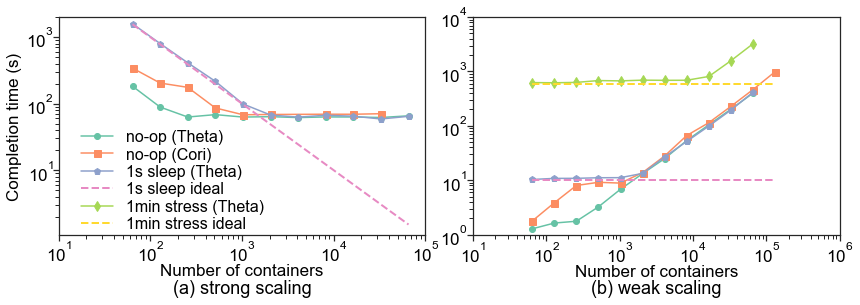

In [121]:
labels = {
    'noop': 'no-op',
    #'sleep10ms': '10 ms sleep',
    #'sleep100ms': '100 ms sleep',
    'sleep1000ms': '1s sleep',
    #'sleep10s': '10s sleep',
    #'sleep100s': '100s sleep'
}

executor_labels = {
    'theta_funcx': 'Theta',
    'cori_funcX_shifter': 'Cori'
}
tasks_per_trial = 100000
fig, axes = plt.subplots(1, 2, figsize=(14,4))

#strong scaling
ax = axes[0]
executors = [
            'theta_funcx', 
            'cori_funcX_shifter'
            ]
#executor = ['theta_funcx']
markers = ['o', 's', 'p', '^', 'd', 'X']
marker_sizes = [6, 7, 7, 7, 7, 7, 6]
colors = sns.color_palette("Set2")
count = 0
for i, (tag, label) in enumerate(labels.items()):
    for j, executor in enumerate(executors):
        cuts = (strong_tasks['tag'] == tag) & \
                (strong_tasks['tasks_per_trial'] == tasks_per_trial) & \
                (strong_tasks['executor'] == executor) & \
                (strong_tasks['connected_workers'] <= 65536)
        if executor == 'cori_funcX_shifter':
            cuts = cuts & (strong_tasks['connected_workers'] <= 32768)
        df = strong_tasks[cuts][['connected_workers', 'completion time']]
        if len(df) == 0: continue
        if tag == 'noop':
            min_time = df['completion time'].min()
            print("""
                The smallest time of {} executor is {}, 
                leading to a throughput of {} tasks/s""".format(executor, min_time, tasks_per_trial/min_time)
            )
        if len(df['connected_workers'].unique()) > 1:
            means = df.astype(float).groupby('connected_workers', as_index=False).mean()
            standard_deviations = df.std()
            executor_label = executor_labels[executor]
            means.plot('connected_workers', 'completion time', 
                       marker=markers[i*2+j], ms=marker_sizes[i*2+j], logy=True, logx=True, 
                       #color=colors[i*2+j],
                       label=label+' ('+executor_labels[executor]+')', ax=ax) # , yerr=list(standard_deviations['completion time'])
            ax.set_xscale('log', basex=10)

        if (tag != 'noop') and (len(df['connected_workers'].unique()) > 1):
        #if (len(df['connected_workers'].unique()) > 1):
            ideal = pd.DataFrame( [{'connected_workers': 2**l} for l in range(6, 17)])
            if tag == 'noop': sleep = 0
            else:
                sleep = int(re.sub("[^0-9^.]", "", tag)) / 1000
            ideal['completion time'] = tasks_per_trial * sleep / ideal['connected_workers']
            ideal.plot('connected_workers', 
                       'completion time', 
                       logy=True, 
                       #color=colors[i*2+j],
                       linestyle='--', 
                       linewidth=2,
                       label='{} ideal'.format(label), ax=ax)


#plt.title(label, fontsize=14)
#plt.ylabel('Completion time [s / {} tasks]'.format(tasks_per_trial), fontsize=14, color='black')

#         box = ax.get_position()
ax.set_ylim([0, 2000])
ax.set_xlim(10, 100000)
ax.set_ylabel('Completion time (s)', fontsize=17, color='black')
ax.get_legend().remove()
ax.tick_params(axis='y', which='minor')
ax.tick_params(axis='both', which='major', pad=-1, labelsize=17, labelcolor='black')
    
sleeps = {
    0 :  'no-op',
    #10: '10ms sleep',
    #100: '100ms sleep',
    1000: '1s sleep',
    #10000: '10s sleep',
    #100000: '10s sleep',
    60000: '1min stress',
}

executor_labels = {
    'theta_funcx': 'Theta',
    'cori_funcX_shifter': 'Cori'
}
tags = {
    0 :  'noop',
    10: 'sleep10ms',
    100: 'sleep100ms',
    1000: 'sleep1000ms',
    10000: 'sleep10s',
    100000: 'sleep100s',
    60000: 'stress'

}

#executor = 'theta_funcx'
executors = [
            'theta_funcx', 
            'cori_funcX_shifter'
            ]
ax = axes[1]
for i, (sleep, label) in enumerate(sleeps.items()):
    tag = tags[sleep]
    for j, executor in enumerate(executors):
        max_workers = 0
        width = 0.15
        cuts = (weak_tasks['tag'] == tag) & \
                (weak_tasks['tasks_per_trial'] == 10 * weak_tasks['connected_workers']) & \
                (weak_tasks['executor'] == executor) & \
                (weak_tasks['connected_workers'] <= 131072)
        df = weak_tasks[cuts]
        if len(df) == 0: continue
        executor_label = executor_labels[executor]
        means = df.groupby('tasks/workers', as_index=False).mean().sort_values('connected_workers')
        means.plot('connected_workers', 'completion time', marker=markers[i*2+j], ms=marker_sizes[i*2+j], 
                   logy=True, logx=True, 
                   #color=colors[i*2+j], 
                   label=label+' ('+executor_labels[executor]+')', ax=ax) # , yerr=list(standard_deviations['completion time'])

        # print(executor, means)
        max_workers = max(max(means['connected_workers']), max_workers)

        if (tag != 'noop') and (len(df['connected_workers'].unique()) > 1):
        #if (len(df['connected_workers'].unique()) > 1):
            ideal = pd.DataFrame( [{'connected_workers': 2**l} for l in range(6, 18)])
            sleep = sleep / 1000
            ideal['completion time'] = 10 * sleep
            ideal.plot('connected_workers', 'completion time', 
                       logy=True, 
                       #color=colors[i*2+j], 
                       linewidth=2, linestyle='--', 
                       label='{} ideal'.format(label), ax=ax)    #ax.set_ylim(max_ylim * 1.2)

    ax.set_ylim([1, 10000])
    ax.set_xlim(10, 1000000)
    #ax.set_ylabel('Completion time (s)', fontsize=13, color='black')
    ax.get_legend().remove()
    ax.tick_params(axis='y', which='minor')
    ax.tick_params(axis='both', which='major', pad=0, labelsize=17, labelcolor='black')

    plt.tick_params(axis='both', which='major', pad=0, labelsize=17, labelcolor='black')
    #legend = plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.5), frameon=True, fontsize=13)
    legend = plt.legend(loc='upper center', 
                        ncol=1, 
                        bbox_to_anchor=(-0.82, 0.55), 
                        columnspacing=-0.2,
                        labelspacing=0.15,
                        fancybox=True, frameon=True, fontsize=16, framealpha=0)
    plt.setp(legend.get_texts(), color='black')
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1)
    plt.subplots_adjust(wspace=0.13, hspace=0)


#titles = ['(a) no-op', '(b) sleep(10 ms)', '(c) sleep(100 ms)', '(d) sleep(1000 ms)']
titles = ['(a) strong scaling', '(b) weak scaling']
for i, ax in enumerate(axes):
    ax.set_xlabel('Number of containers', labelpad=-0.5, fontsize=17, color='black')
    ax.set_title(titles[i], y=-0.3, fontsize=18, color='black')

plt.savefig('png/strong-weak.png', bbox_inches = "tight", dpi=1000)



                The smallest time of theta_funcx executor is 59.03322243690491, 
                leading to a throughput of 1693.961397870168 tasks/s

                The smallest time of cori_funcX_shifter executor is 68.19523978233337, 
                leading to a throughput of 1466.378009948811 tasks/s

C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/3582620736.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)
C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/3582620736.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)
C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/3582620736.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)
C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/3582620736.py:74: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Inv

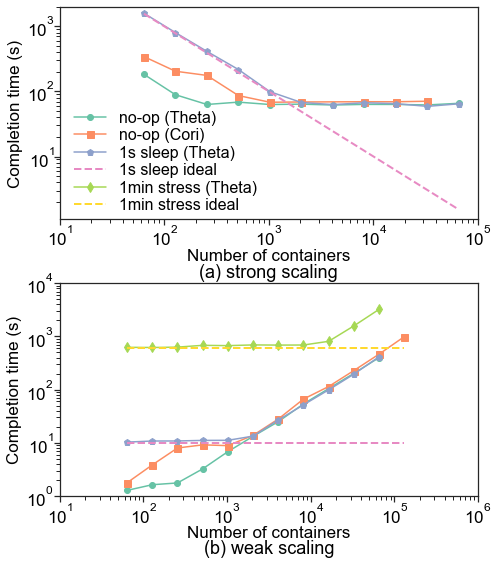

In [129]:
labels = {
    'noop': 'no-op',
    #'sleep10ms': '10 ms sleep',
    #'sleep100ms': '100 ms sleep',
    'sleep1000ms': '1s sleep',
    #'sleep10s': '10s sleep',
    #'sleep100s': '100s sleep'
}

executor_labels = {
    'theta_funcx': 'Theta',
    'cori_funcX_shifter': 'Cori'
}
tasks_per_trial = 100000
fig, axes = plt.subplots(2, 1, figsize=(7.5,9))

#strong scaling
ax = axes[0]
executors = [
            'theta_funcx', 
            'cori_funcX_shifter'
            ]
#executor = ['theta_funcx']
markers = ['o', 's', 'p', '^', 'd', 'X']
marker_sizes = [6, 7, 7, 7, 7, 7, 6]
colors = sns.color_palette("Set2")
count = 0
for i, (tag, label) in enumerate(labels.items()):
    for j, executor in enumerate(executors):
        cuts = (strong_tasks['tag'] == tag) & \
                (strong_tasks['tasks_per_trial'] == tasks_per_trial) & \
                (strong_tasks['executor'] == executor) & \
                (strong_tasks['connected_workers'] <= 65536)
        if executor == 'cori_funcX_shifter':
            cuts = cuts & (strong_tasks['connected_workers'] <= 32768)
        df = strong_tasks[cuts][['connected_workers', 'completion time']]
        if len(df) == 0: continue
        if tag == 'noop':
            min_time = df['completion time'].min()
            print("""
                The smallest time of {} executor is {}, 
                leading to a throughput of {} tasks/s""".format(executor, min_time, tasks_per_trial/min_time)
            )
        if len(df['connected_workers'].unique()) > 1:
            means = df.astype(float).groupby('connected_workers', as_index=False).mean()
            standard_deviations = df.std()
            executor_label = executor_labels[executor]
            means.plot('connected_workers', 'completion time', 
                       marker=markers[i*2+j], ms=marker_sizes[i*2+j], logy=True, logx=True, 
                       #color=colors[i*2+j],
                       label=label+' ('+executor_labels[executor]+')', ax=ax) # , yerr=list(standard_deviations['completion time'])
            ax.set_xscale('log', basex=10)

        if (tag != 'noop') and (len(df['connected_workers'].unique()) > 1):
        #if (len(df['connected_workers'].unique()) > 1):
            ideal = pd.DataFrame( [{'connected_workers': 2**l} for l in range(6, 17)])
            if tag == 'noop': sleep = 0
            else:
                sleep = int(re.sub("[^0-9^.]", "", tag)) / 1000
            ideal['completion time'] = tasks_per_trial * sleep / ideal['connected_workers']
            ideal.plot('connected_workers', 
                       'completion time', 
                       logy=True, 
                       #color=colors[i*2+j],
                       linestyle='--', 
                       linewidth=2,
                       label='{} ideal'.format(label), ax=ax)


#plt.title(label, fontsize=14)
#plt.ylabel('Completion time [s / {} tasks]'.format(tasks_per_trial), fontsize=14, color='black')

#         box = ax.get_position()
ax.set_ylim([0, 2000])
ax.set_xlim(10, 100000)
ax.set_ylabel('Completion time (s)', fontsize=17, color='black')
ax.get_legend().remove()
ax.tick_params(axis='y', which='minor')
ax.tick_params(axis='both', which='major', pad=-1, labelsize=17, labelcolor='black')

    
sleeps = {
    0 :  'no-op',
    #10: '10ms sleep',
    #100: '100ms sleep',
    1000: '1s sleep',
    #10000: '10s sleep',
    #100000: '10s sleep',
    60000: '1min stress',
}

executor_labels = {
    'theta_funcx': 'Theta',
    'cori_funcX_shifter': 'Cori'
}
tags = {
    0 :  'noop',
    10: 'sleep10ms',
    100: 'sleep100ms',
    1000: 'sleep1000ms',
    10000: 'sleep10s',
    100000: 'sleep100s',
    60000: 'stress'

}

#executor = 'theta_funcx'
executors = [
            'theta_funcx', 
            'cori_funcX_shifter'
            ]
ax = axes[1]
for i, (sleep, label) in enumerate(sleeps.items()):
    tag = tags[sleep]
    for j, executor in enumerate(executors):
        max_workers = 0
        width = 0.15
        cuts = (weak_tasks['tag'] == tag) & \
                (weak_tasks['tasks_per_trial'] == 10 * weak_tasks['connected_workers']) & \
                (weak_tasks['executor'] == executor) & \
                (weak_tasks['connected_workers'] <= 131072)
        df = weak_tasks[cuts]
        if len(df) == 0: continue
        executor_label = executor_labels[executor]
        means = df.groupby('tasks/workers', as_index=False).mean().sort_values('connected_workers')
        means.plot('connected_workers', 'completion time', marker=markers[i*2+j], ms=marker_sizes[i*2+j], 
                   logy=True, logx=True, 
                   #color=colors[i*2+j], 
                   label=label+' ('+executor_labels[executor]+')', ax=ax) # , yerr=list(standard_deviations['completion time'])

        #print(executor, means)
        max_workers = max(max(means['connected_workers']), max_workers)

        if (tag != 'noop') and (len(df['connected_workers'].unique()) > 1):
        #if (len(df['connected_workers'].unique()) > 1):
            ideal = pd.DataFrame( [{'connected_workers': 2**l} for l in range(6, 18)])
            sleep = sleep / 1000
            ideal['completion time'] = 10 * sleep
            ideal.plot('connected_workers', 'completion time', 
                       logy=True, 
                       #color=colors[i*2+j], 
                       linewidth=2, linestyle='--', 
                       label='{} ideal'.format(label), ax=ax)    #ax.set_ylim(max_ylim * 1.2)

    ax.set_ylim([1, 10000])
    ax.set_xlim(10, 1000000)
    #ax.set_ylabel('Completion time (s)', fontsize=13, color='black')
    ax.get_legend().remove()
    ax.tick_params(axis='y', which='minor')
    ax.tick_params(axis='both', which='major', pad=0, labelsize=17, labelcolor='black')

    plt.tick_params(axis='both', which='major', pad=0, labelsize=17, labelcolor='black')
    #legend = plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.5), frameon=True, fontsize=13)
    legend = plt.legend(loc='upper left', 
                        ncol=1, 
                        bbox_to_anchor=(0, 1.88), 
                        columnspacing=-0.2,
                        labelspacing=0.15,
                        fancybox=True, frameon=True, fontsize=16, framealpha=0)
    plt.setp(legend.get_texts(), color='black')
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1)
    plt.subplots_adjust(wspace=0, hspace=0.3)

ax.set_ylabel('Completion time (s)', fontsize=17, color='black')
#titles = ['(a) no-op', '(b) sleep(10 ms)', '(c) sleep(100 ms)', '(d) sleep(1000 ms)']
titles = ['(a) strong scaling', '(b) weak scaling']
for i, ax in enumerate(axes):
    ax.set_xlabel('Number of containers', labelpad=-0.5, fontsize=17, color='black')
    ax.set_title(titles[i], y=-0.3, fontsize=18, color='black')
plt.savefig('png/strong-weak.pdf', bbox_inches = "tight", dpi=1000)



                The smallest time of theta_funcx executor is 59.03322243690491, 
                leading to a throughput of 1693.961397870168 tasks/s


C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/2212134291.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)
C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/2212134291.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)



                The smallest time of cori_funcX_shifter executor is 68.19523978233337, 
                leading to a throughput of 1466.378009948811 tasks/s


C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/2212134291.py:52: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', basex=10)
C:\Users\YUHUIL~1\AppData\Local\Temp/ipykernel_23832/2212134291.py:74: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim([0, 2000])


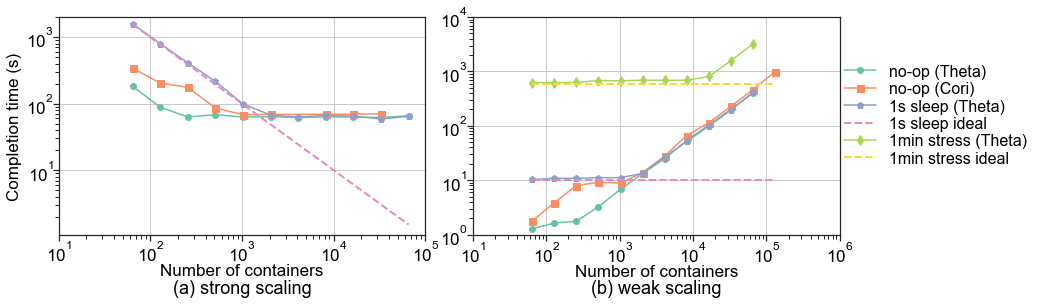

In [148]:
labels = {
    'noop': 'no-op',
    #'sleep10ms': '10 ms sleep',
    #'sleep100ms': '100 ms sleep',
    'sleep1000ms': '1s sleep',
    #'sleep10s': '10s sleep',
    #'sleep100s': '100s sleep'
}

executor_labels = {
    'theta_funcx': 'Theta',
    'cori_funcX_shifter': 'Cori'
}
tasks_per_trial = 100000
fig, axes = plt.subplots(1, 2, figsize=(14,4))

#strong scaling
ax = axes[0]
executors = [
            'theta_funcx', 
            'cori_funcX_shifter'
            ]
#executor = ['theta_funcx']
markers = ['o', 's', 'p', '^', 'd', 'X']
marker_sizes = [6, 7, 7, 7, 7, 7, 6]
colors = sns.color_palette("Set2")
count = 0
for i, (tag, label) in enumerate(labels.items()):
    for j, executor in enumerate(executors):
        cuts = (strong_tasks['tag'] == tag) & \
                (strong_tasks['tasks_per_trial'] == tasks_per_trial) & \
                (strong_tasks['executor'] == executor) & \
                (strong_tasks['connected_workers'] <= 65536)
        if executor == 'cori_funcX_shifter':
            cuts = cuts & (strong_tasks['connected_workers'] <= 32768)
        df = strong_tasks[cuts][['connected_workers', 'completion time']]
        if len(df) == 0: continue
        if tag == 'noop':
            min_time = df['completion time'].min()
            print("""
                The smallest time of {} executor is {}, 
                leading to a throughput of {} tasks/s""".format(executor, min_time, tasks_per_trial/min_time)
            )
        if len(df['connected_workers'].unique()) > 1:
            means = df.astype(float).groupby('connected_workers', as_index=False).mean()
            standard_deviations = df.std()
            executor_label = executor_labels[executor]
            means.plot('connected_workers', 'completion time', 
                       marker=markers[i*2+j], ms=marker_sizes[i*2+j], logy=True, logx=True, 
                       #color=colors[i*2+j],
                       label=label+' ('+executor_labels[executor]+')', ax=ax) # , yerr=list(standard_deviations['completion time'])
            ax.set_xscale('log', basex=10)

        if (tag != 'noop') and (len(df['connected_workers'].unique()) > 1):
        #if (len(df['connected_workers'].unique()) > 1):
            ideal = pd.DataFrame( [{'connected_workers': 2**l} for l in range(6, 17)])
            if tag == 'noop': sleep = 0
            else:
                sleep = int(re.sub("[^0-9^.]", "", tag)) / 1000
            ideal['completion time'] = tasks_per_trial * sleep / ideal['connected_workers']
            ideal.plot('connected_workers', 
                       'completion time', 
                       logy=True, 
                       #color=colors[i*2+j],
                       linestyle='--', 
                       linewidth=2,
                       label='{} ideal'.format(label), ax=ax)


#plt.title(label, fontsize=14)
#plt.ylabel('Completion time [s / {} tasks]'.format(tasks_per_trial), fontsize=14, color='black')

#         box = ax.get_position()
ax.set_ylim([0, 2000])
ax.set_xlim(10, 100000)
ax.set_ylabel('Completion time (s)', fontsize=17, color='black')
ax.get_legend().remove()
ax.tick_params(axis='y', which='minor')
ax.tick_params(axis='both', which='major', pad=-1, labelsize=17, labelcolor='black')
ax.grid(which='major')


sleeps = {
    0 :  'no-op',
    #10: '10ms sleep',
    #100: '100ms sleep',
    1000: '1s sleep',
    #10000: '10s sleep',
    #100000: '10s sleep',
    60000: '1min stress',
}

executor_labels = {
    'theta_funcx': 'Theta',
    'cori_funcX_shifter': 'Cori'
}
tags = {
    0 :  'noop',
    10: 'sleep10ms',
    100: 'sleep100ms',
    1000: 'sleep1000ms',
    10000: 'sleep10s',
    100000: 'sleep100s',
    60000: 'stress'

}

#executor = 'theta_funcx'
executors = [
            'theta_funcx', 
            'cori_funcX_shifter'
            ]
ax = axes[1]
for i, (sleep, label) in enumerate(sleeps.items()):
    tag = tags[sleep]
    for j, executor in enumerate(executors):
        max_workers = 0
        width = 0.15
        cuts = (weak_tasks['tag'] == tag) & \
                (weak_tasks['tasks_per_trial'] == 10 * weak_tasks['connected_workers']) & \
                (weak_tasks['executor'] == executor) & \
                (weak_tasks['connected_workers'] <= 131072)
        df = weak_tasks[cuts]
        if len(df) == 0: continue
        executor_label = executor_labels[executor]
        means = df.groupby('tasks/workers', as_index=False).mean().sort_values('connected_workers')
        means.plot('connected_workers', 'completion time', marker=markers[i*2+j], ms=marker_sizes[i*2+j], 
                   logy=True, logx=True, 
                   #color=colors[i*2+j], 
                   label=label+' ('+executor_labels[executor]+')', ax=ax) # , yerr=list(standard_deviations['completion time'])

        # print(executor, means)
        max_workers = max(max(means['connected_workers']), max_workers)

        if (tag != 'noop') and (len(df['connected_workers'].unique()) > 1):
        #if (len(df['connected_workers'].unique()) > 1):
            ideal = pd.DataFrame( [{'connected_workers': 2**l} for l in range(6, 18)])
            sleep = sleep / 1000
            ideal['completion time'] = 10 * sleep
            ideal.plot('connected_workers', 'completion time', 
                       logy=True, 
                       #color=colors[i*2+j], 
                       linewidth=2, linestyle='--', 
                       label='{} ideal'.format(label), ax=ax)    #ax.set_ylim(max_ylim * 1.2)

    ax.set_ylim([1, 10000])
    ax.set_xlim(10, 1000000)
    #ax.set_ylabel('Completion time (s)', fontsize=13, color='black')
    ax.get_legend().remove()
    ax.tick_params(axis='y', which='minor')
    ax.tick_params(axis='both', which='major', pad=0, labelsize=17, labelcolor='black')

    plt.tick_params(axis='both', which='major', pad=0, labelsize=17, labelcolor='black')
    #legend = plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.5), frameon=True, fontsize=13)
    legend = plt.legend(loc='center right', 
                        ncol=1, 
                        bbox_to_anchor=(1.55, 0.55), 
                        columnspacing=-0.2,
                        labelspacing=0.15,
                        fancybox=True, frameon=True, fontsize=16, framealpha=0)
    plt.setp(legend.get_texts(), color='black')
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(1)
    plt.subplots_adjust(wspace=0.13, hspace=0)


#titles = ['(a) no-op', '(b) sleep(10 ms)', '(c) sleep(100 ms)', '(d) sleep(1000 ms)']
titles = ['(a) strong scaling', '(b) weak scaling']
for i, ax in enumerate(axes):
    ax.set_xlabel('Number of containers', labelpad=-0.5, fontsize=17, color='black')
    ax.set_title(titles[i], y=-0.3, fontsize=18, color='black')

ax.grid(which='major')
plt.savefig('png/strong-weak.pdf', bbox_inches = "tight", dpi=1000)
